In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [2]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#Convert the TotalCharges' object datatype to numeric
#Convert the Senior Citizen numeric datatype to object

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
df.shape

(7043, 21)

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
#Class Distribution before preprocessing
churn_counts = df['Churn'].value_counts()
print(churn_counts)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [11]:
#Check Missing Values
df.isnull().sum().sort_values(ascending=False)


TotalCharges        11
customerID           0
DeviceProtection     0
MonthlyCharges       0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
gender               0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
tenure               0
Dependents           0
Partner              0
SeniorCitizen        0
Churn                0
dtype: int64

In [12]:
df[df.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
# Checking for tenure = 0 which means the customer has just joined or did not stay at all
df[df['tenure'] == 0].index


Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [14]:
# Drop Missing Value
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

In [15]:
df.isnull().sum().sort_values(ascending=False)


customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

In [16]:
df[df['tenure'] == 0].index


Index([], dtype='int64')

In [17]:
df.shape


(7032, 21)

In [18]:
#Check Duplicates Value
df.duplicated().sum()

0

In [19]:
duplicate_customers = df[df.duplicated('customerID', keep=False)]

# Display result
if duplicate_customers.empty:
    print("No duplicate Customer IDs found in the dataset.")
else:
    print(f"Found {duplicate_customers.shape[0]} duplicate Customer ID records:")
    display(duplicate_customers)

No duplicate Customer IDs found in the dataset.


In [20]:
# Drop the 'CustomerID' column since it carried no predictive value for churn modelling
df.drop('customerID', axis=1, inplace=True)

In [21]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [22]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

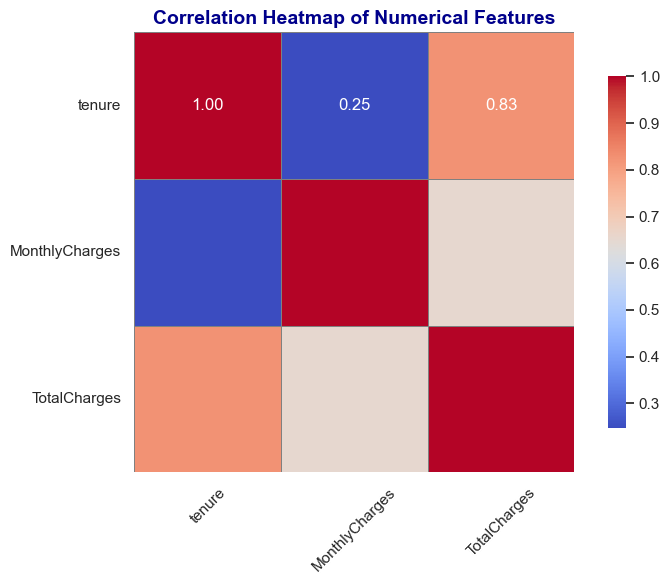

In [23]:
#Correlation Heatmap of Numerical Features
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Set style and color map
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Create heatmap
sns.heatmap(
    numerical_columns.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": 0.8},
    square=True
)

# Add title and formatting
plt.title("Correlation Heatmap of Numerical Features", fontsize=14, fontweight='bold', color='darkblue')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



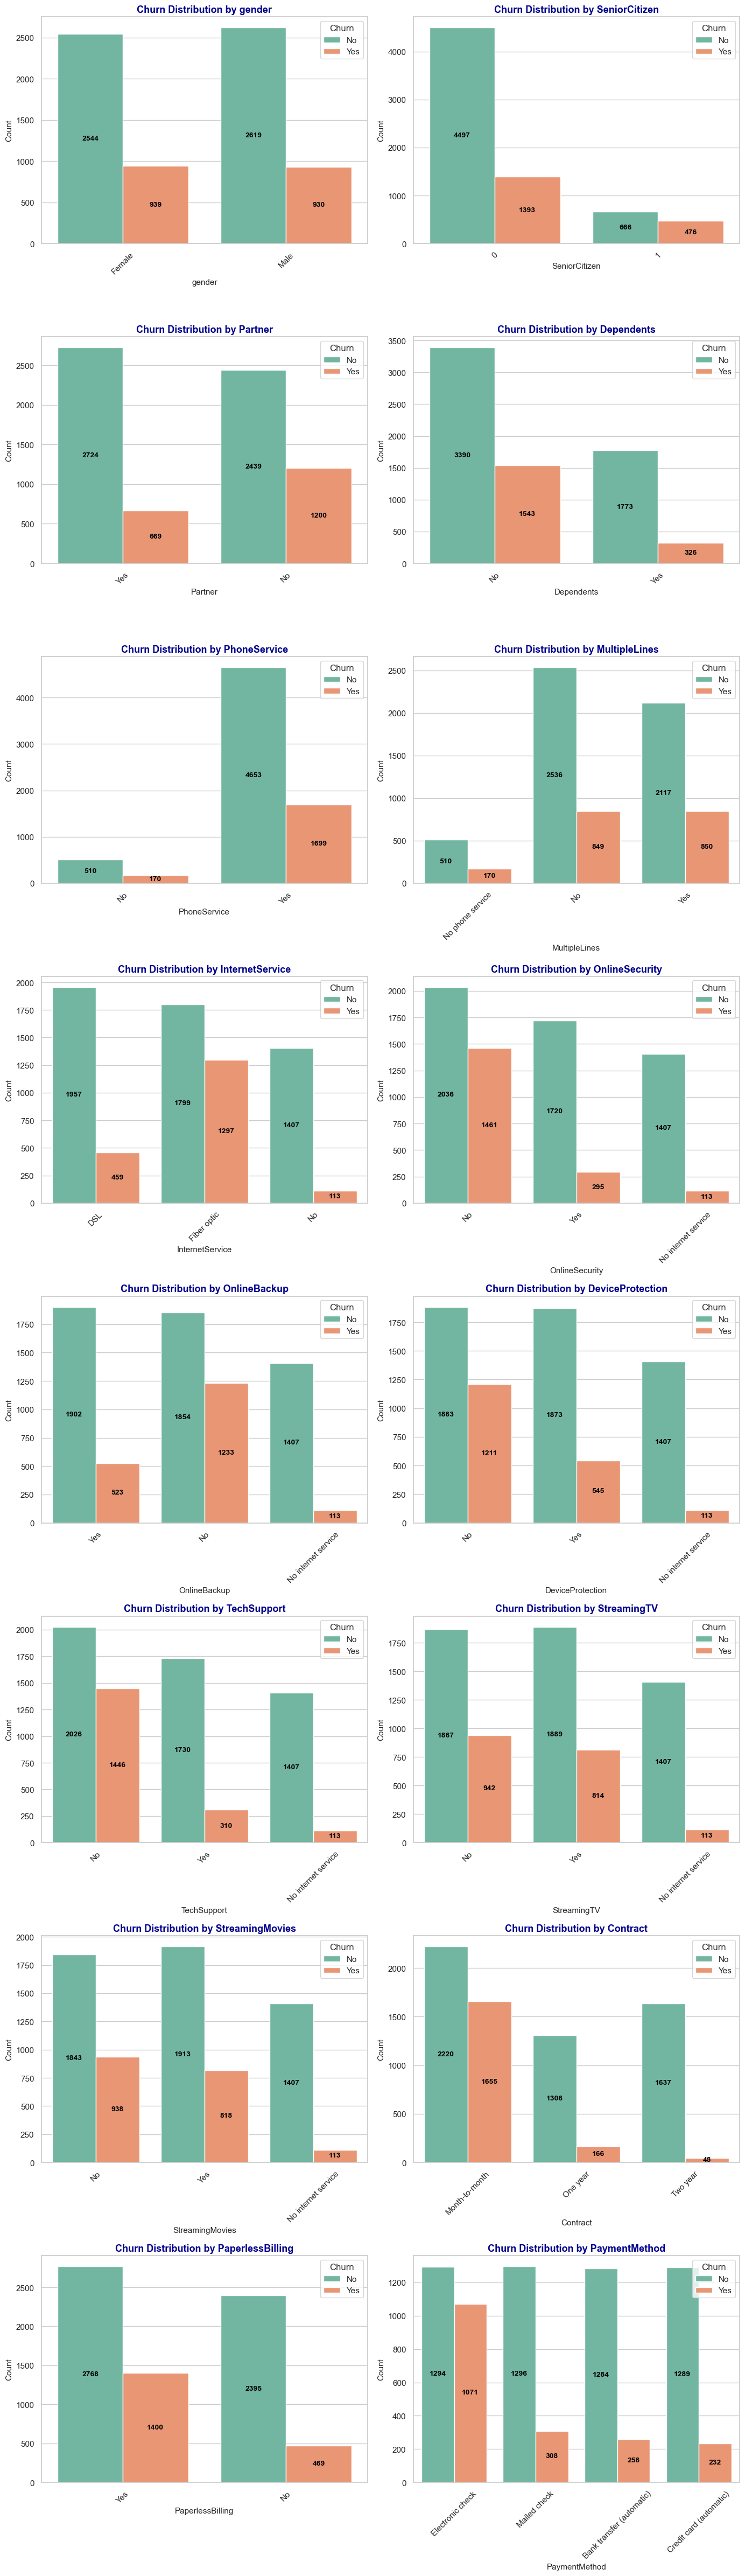

In [24]:
#Multivariate analysis between categorical features and Churn
# Set style and palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

# Categorical columns except 'Churn'
categorical_columns = df.select_dtypes(include='object').columns.drop('Churn')

# Number of plots
n = len(categorical_columns)
cols = 2  # 2 plots per row
rows = (n + 1) // cols  # Calculate number of rows needed

plt.figure(figsize=(14, 6 * rows))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(rows, cols, i)
    ax = sns.countplot(data=df, x=col, hue="Churn", palette=palette)

    for p in ax.patches:
        count = int(p.get_height())
        if count > 0:
            x = p.get_x() + p.get_width() / 2
            y = p.get_height() * 0.5 + 5
            ax.annotate(f'{count}', (x, y), ha='center', va='center', fontsize=10, fontweight='bold', color='black')

    plt.title(f"Churn Distribution by {col}", fontsize=13, fontweight='bold', color='darkblue')
    plt.xlabel(col, fontsize=11)
    plt.ylabel("Count", fontsize=11)
    plt.xticks(rotation=45)
    plt.legend(title="Churn", loc='upper right')

plt.tight_layout()
plt.show()

### **Class Distribution after preprocessed**

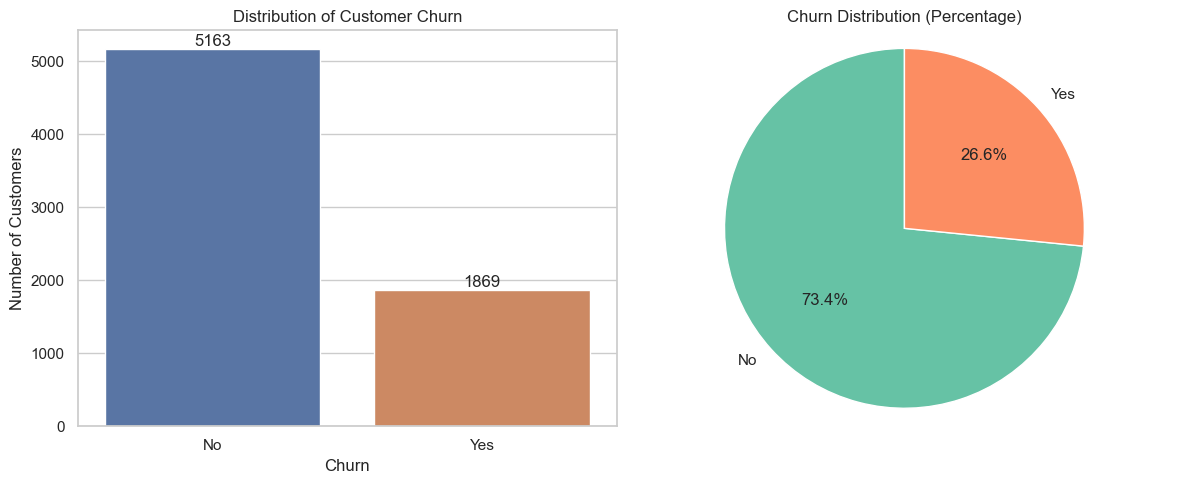

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: Countplot
sns.countplot(x='Churn', data=df, ax=axes[0])
axes[0].set_title("Distribution of Customer Churn")
axes[0].set_xlabel('Churn')
axes[0].set_ylabel("Number of Customers")
axes[0].bar_label(axes[0].containers[0])

# Right: Pie Chart
churn_counts = df['Churn'].value_counts()
churn_percent = churn_counts / churn_counts.sum() * 100
axes[1].pie(churn_percent, labels=churn_percent.index, autopct='%1.1f%%',
            startangle=90, colors=['#66c2a5', '#fc8d62'])
axes[1].set_title("Churn Distribution (Percentage)")
axes[1].axis('equal')

plt.tight_layout()
plt.show()

In [26]:
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

In [27]:
X = df.drop(labels=['Churn'],axis=1)
y = df[['Churn']]

**Handling missing values and Standardization**

In [28]:
# Sepearate Categorical and Numerical columns
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

In [29]:
cat_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [30]:
num_cols

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [31]:
#Creating Pipeline with Column Transformer
# Numerical Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline(
                steps = [
                ('imputer',SimpleImputer(strategy='median')),   #Replacing missing value with median value
                ('scaler',StandardScaler())                     #Rescaling or Standardization
                ]
            )
num_pipeline
# Categorical Pipeline
cat_pipeline = Pipeline(
                steps=[
                ('imputer',SimpleImputer(strategy='most_frequent')),    # Replacing missing value with mode value
                ('label_encoder',OrdinalEncoder()),                     # Encoding the categorical value
                ]
            )

cat_pipeline


Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('label_encoder', OrdinalEncoder())])

In [32]:
preprocessor = ColumnTransformer(
                [
                ('num_pipeline',num_pipeline,num_cols),
                ('cat_pipeline',cat_pipeline,cat_cols)
                ]
            )
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('label_encoder',
                                                  OrdinalEncoder())]),
                                 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

In [33]:
# Splitting the dataset into Training and Testing (70%,30%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [34]:
# X = preprocessor.fit_transform(X)
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

# Performing SMOTE on the training data to balance the dataset without duplicating exiting monority
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [35]:
X_train.shape


(7228, 19)

In [36]:
X_test.shape


(2110, 19)

In [37]:
y_train.shape

(7228, 1)

In [38]:
y_test.shape

(2110, 1)

## Logistic Regression Model

## Dataset Processing for Logistic Regression Model

In [39]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [40]:
df_processed = df.copy()
print("Created a working copy of the DataFrame called 'df_processed'.")

Created a working copy of the DataFrame called 'df_processed'.


In [41]:
# Convert 'TotalCharges' to numeric, coercing errors (like empty strings) to NaN
df_processed['TotalCharges'] = pd.to_numeric(df_processed['TotalCharges'], errors='coerce')
print("Converted 'TotalCharges' to numeric, empty strings are now NaN.")

# Drop rows where 'TotalCharges' is NaN
df_processed.dropna(subset=['TotalCharges'], inplace=True)
print("Dropped rows with missing values in 'TotalCharges'.")
print(f"New number of rows: {len(df_processed)}")

Converted 'TotalCharges' to numeric, empty strings are now NaN.
Dropped rows with missing values in 'TotalCharges'.
New number of rows: 7032


In [42]:
# Mapping for 'gender'
gender_mapping = {'Female': 0, 'Male': 1}
df_processed['gender'] = df_processed['gender'].replace(gender_mapping)
print("Encoded 'gender' column.")

# List of columns that are strictly 'Yes'/'No'
binary_cols_yes_no = [
    'Partner', 'Dependents', 'PaperlessBilling', 'Churn'
]
binary_mapping_yes_no = {'Yes': 1, 'No': 0}
for col in binary_cols_yes_no:
    df_processed[col] = df_processed[col].replace(binary_mapping_yes_no)
print("Encoded 'Partner', 'Dependents', 'PaperlessBilling', 'Churn'.")

# Columns with 'No X service' which should also be treated as 'No'
special_binary_cols = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# For 'PhoneService': 'Yes' -> 1, 'No' -> 0 (based on value_counts: it had 'Yes' and 'No')
df_processed['PhoneService'] = df_processed['PhoneService'].replace({'Yes': 1, 'No': 0})
print("Encoded 'PhoneService'.")

# For other special binary columns: unify 'No X service' to 'No', then apply Yes/No mapping
replace_with_no_value_mapping = {'No internet service': 'No', 'No phone service': 'No'}
for col in special_binary_cols:
    if col != 'PhoneService': # 'PhoneService' handled above
        df_processed[col] = df_processed[col].replace(replace_with_no_value_mapping)
        df_processed[col] = df_processed[col].replace(binary_mapping_yes_no)
print("Encoded 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'.")

Encoded 'gender' column.
Encoded 'Partner', 'Dependents', 'PaperlessBilling', 'Churn'.
Encoded 'PhoneService'.
Encoded 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'.


In [43]:
# List of columns to apply one-hot encoding
one_hot_cols = [
    'InternetService',
    'Contract',
    'PaymentMethod'
]

# Apply one-hot encoding with drop_first=True to avoid multicollinearity
df_processed = pd.get_dummies(df_processed, columns=one_hot_cols, drop_first=True, dtype=int)
print("Performed one-hot encoding for 'InternetService', 'Contract', 'PaymentMethod'.")

Performed one-hot encoding for 'InternetService', 'Contract', 'PaymentMethod'.


In [44]:
print("\n--- Final Processed DataFrame Info ---")
df_processed.info()
print("\n--- Final Processed DataFrame Head ---")
print(df_processed.head())


--- Final Processed DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   object 
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       7032 non-null   int64  
 10  TechSupport                          

In [45]:
print(df_processed.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [46]:
print(df_processed['PhoneService'].dtype)

int64


### Feature Scaling (Standardization)

In [47]:
from sklearn.preprocessing import StandardScaler

# Identify the numerical columns to be scaled
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the selected numerical columns
# We use .copy() to avoid SettingWithCopyWarning, ensuring we work on a copy of the slice
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols].copy())

print("Numerical features scaled successfully!")
print("\n--- Scaled Numerical Features (first 5 rows) ---")
print(df_processed[numerical_cols].head())
print("\n--- df_processed Info After Scaling (check dtypes remain float64) ---")
df_processed.info()

Numerical features scaled successfully!

--- Scaled Numerical Features (first 5 rows) ---
     tenure  MonthlyCharges  TotalCharges
0 -1.280248       -1.161694     -0.994194
1  0.064303       -0.260878     -0.173740
2 -1.239504       -0.363923     -0.959649
3  0.512486       -0.747850     -0.195248
4 -1.239504        0.196178     -0.940457

--- df_processed Info After Scaling (check dtypes remain float64) ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   object 
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   float64
 5   Phon

In [48]:
# Convert 'SeniorCitizen' to integer type
# Using errors='coerce' will turn any non-convertible values into NaN,
# though based on our previous checks, it should only contain 0s and 1s.
df_processed['SeniorCitizen'] = pd.to_numeric(df_processed['SeniorCitizen'], errors='coerce').astype(int)

print("Fixed 'SeniorCitizen' column to int64 type.")

# Confirm the change
print("\n--- Current df_processed Info After Fixing SeniorCitizen ---")
df_processed.info()

Fixed 'SeniorCitizen' column to int64 type.

--- Current df_processed Info After Fixing SeniorCitizen ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int32  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   float64
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       

In [49]:
# Define features (X) - all columns except 'Churn'
X = df_processed.drop('Churn', axis=1)

# Define target (y) - the 'Churn' column
y = df_processed['Churn']

print("Features (X) and Target (y) successfully separated.")
print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

Features (X) and Target (y) successfully separated.
Shape of X (features): (7032, 23)
Shape of y (target): (7032,)


In [50]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing, 80% for training
# random_state=42 ensures that you get the same split every time you run the code (important for reproducibility)
# stratify=y is crucial for imbalanced datasets like churn, ensuring the proportion of churned/non-churned customers
# is maintained in both the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data successfully split into training and testing sets!")
print(f"X_train shape: {X_train.shape}") # Features for training
print(f"X_test shape: {X_test.shape}")   # Features for testing
print(f"y_train shape: {y_train.shape}") # Target for training
print(f"y_test shape: {y_test.shape}")   # Target for testing

print("\n--- First 5 rows of X_train (Features for training) ---")
print(X_train.head())
print("\n--- First 5 rows of y_train (Target for training) ---")
print(y_train.head())

Data successfully split into training and testing sets!
X_train shape: (5625, 23)
X_test shape: (1407, 23)
y_train shape: (5625,)
y_test shape: (1407,)

--- First 5 rows of X_train (Features for training) ---
      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
1413       1              0        1           1  1.327365             1   
7003       1              0        0           0 -0.261649             0   
3355       0              0        1           0  1.449597             1   
4494       1              0        0           0 -1.198760             1   
3541       0              0        1           0  0.675462             0   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  \
1413              1               1             1                 1   
7003              0               0             0                 1   
3355              1               0             1                 1   
4494              0               0             1 

## Train the Model

In [51]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
# random_state for reproducibility
# solver='liblinear' is a good default for smaller datasets and for dealing with L1/L2 regularization
# C=1.0 is the inverse of regularization strength; smaller values specify stronger regularization.
# Max_iter is important for convergence for some solvers.
model = LogisticRegression(random_state=42, solver='liblinear', C=1.0, max_iter=1000)

print("Logistic Regression model initialized.")

# Train the model using the training data
# X_train are the features, y_train is the target
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully on the training data!")

Logistic Regression model initialized.
Logistic Regression model trained successfully on the training data!


### Predict and Evaluate

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

print("Predictions made on the test set.")

# Evaluate the model
print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Accuracy Score ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Predictions made on the test set.

--- Confusion Matrix ---
[[918 115]
 [161 213]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407


--- Accuracy Score ---
Accuracy: 0.8038
